# 1 Cargar y examinar el DataSet

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set_style('dark')

df = pd.read_csv("USA Housing Dataset.csv")
df


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [17]:
# tipos de datos que contiene cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

# 2 Análisis Exploratorio de Datos (EDA)

In [6]:
# para este ejercicio se utilizará las columnas price, bedrooms, bathrooms, floors, street, city
df2 = df[['price','bedrooms','bathrooms','floors','street','city']]

# Validar que columnas tienen valores nulos
print(df2[df2.isnull().any(axis=1)])

Empty DataFrame
Columns: [price, bedrooms, bathrooms, floors, street, city]
Index: []


# 2.1 Estadisticas Descriptivas

In [29]:
precioMin = df2['price'].min()
precioMax = df2['price'].max()
rangoPrecio = precioMax - precioMin
PrecioPromedio = df['price'].mean().__round__(2)

# Input de los datos
print(f"El precio menor es: ${precioMin}")
print(f"El precio mayor es: ${precioMax}")
print(f"El rango de precios es: ${rangoPrecio}")
print(f"Precio Promedio: ${PrecioPromedio}")

El precio menor es: $0.0
El precio mayor es: $26590000.0
El rango de precios es: $26590000.0
Precio Promedio: $553062.88


In [7]:
# Como hay casas que contienen precio 0, se deberan eliminar
print(df2[df2['price'] == 0]) # muestra cuantos registros tienen precio == 0

dfClean = df2[df2['price'] > 0]
dfClean # Imprimiendo el DataFrame sin los precios 0

      price  bedrooms  bathrooms  floors                         street  \
3894    0.0       3.0       1.75     1.0                3911 S 328th St   
3896    0.0       4.0       2.75     1.0                2120 31st Ave W   
3897    0.0       6.0       2.75     1.0        12271 Marine View Dr SW   
3898    0.0       5.0       3.50     2.0               21809 SE 38th Pl   
3901    0.0       5.0       1.50     1.0        14901-14999 12th Ave SW   
3902    0.0       4.0       4.00     2.0         1223-1237 244th Ave NE   
3914    0.0       2.0       2.50     1.0             39612 254th Ave SE   
3916    0.0       4.0       2.25     1.0                216 SW 183rd St   
3922    0.0       5.0       4.50     2.0            6925 Oakmont Ave SE   
3923    0.0       5.0       4.00     2.0                 9235 NE 5th St   
3925    0.0       4.0       4.50     2.0              4140 Boulevard Pl   
3926    0.0       4.0       1.50     1.0      31603 E Lake Morton Dr SE   
3929    0.0       4.0    

,price,bedrooms,bathrooms,floors,street,city
0,3.760000e+05,3.0,2.00,3.0,9245-9249 Fremont Ave N,Seattle
1,8.000000e+05,4.0,3.25,2.0,33001 NE 24th St,Carnation
2,2.238888e+06,5.0,6.50,2.0,7070 270th Pl SE,Issaquah
3,3.240000e+05,3.0,2.25,2.0,820 NW 95th St,Seattle
4,5.499000e+05,5.0,2.75,1.0,10834 31st Ave SW,Seattle
...,...,...,...,...,...,...
4135,3.081667e+05,3.0,1.75,1.0,501 N 143rd St,Seattle
4136,5.343333e+05,3.0,2.50,2.0,14855 SE 10th Pl,Bellevue
4137,4.169042e+05,3.0,2.50,2.0,759 Ilwaco Pl NE,Renton
4138,2.034000e+05,4.0,2.00,1.0,5148 S Creston St,Seattle


In [33]:
# Imprimiendo nuevamente los precios
precioMin = df2['price'].min()
precioMax = df2['price'].max()
rangoPrecio = precioMax - precioMin
PrecioPromedio = df['price'].mean().__round__(2)

# Input de los datos
print(f"El precio menor es: ${precioMin}")
print(f"El precio mayor es: ${precioMax}")
print(f"El rango de precios es: ${rangoPrecio}")
print(f"Precio Promedio: ${PrecioPromedio}")

El precio menor es: $7800.0
El precio mayor es: $26590000.0
El rango de precios es: $26582200.0
Precio Promedio: $553062.88


In [22]:
# Analizar caracteristicas puntuales (habitaciones, baños, pisos)
dfClean[['bedrooms','bathrooms','floors']].describe().round(0)

# Se observa que, la media de habitaciones de una casa en USA son 3, mientras que de baños
# y número de niveles son 2

,bedrooms,bathrooms,floors
count,4091.0,4091.0,4091.0
mean,3.0,2.0,2.0
std,1.0,1.0,1.0
min,0.0,0.0,1.0
25%,3.0,2.0,1.0
50%,3.0,2.0,2.0
75%,4.0,2.0,2.0
max,8.0,7.0,4.0


# 3 Visualización

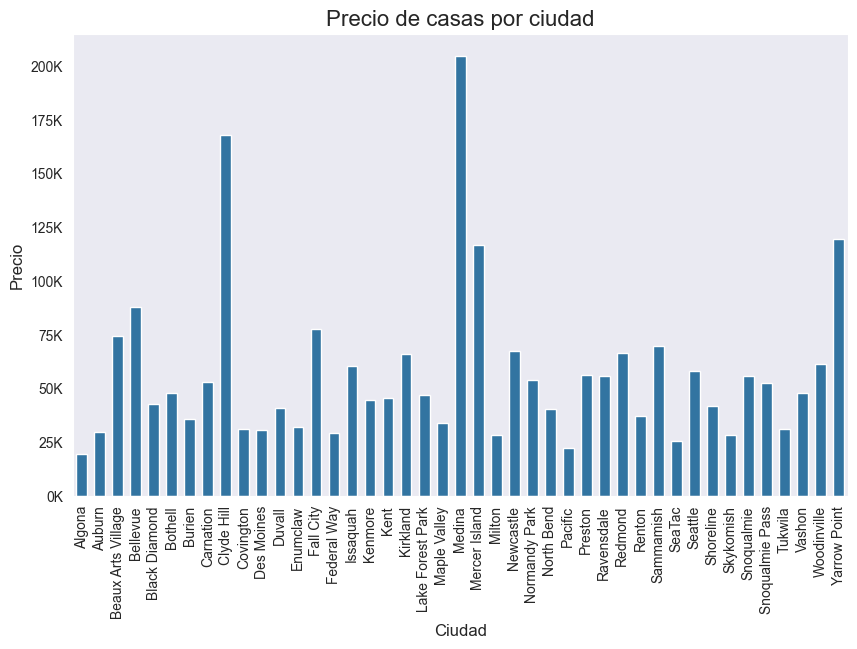

In [76]:
# como las ciudades se repiten, se agruparan
dfPrecioCiudad = dfClean.groupby('city')['price'].mean().reset_index()
# Promedio de precio de la casa, dependiendo la ciudad
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='price', data=dfPrecioCiudad, width=0.6)
plt.xticks(rotation=90)

def formatear_precio(x, pos):
    return f'{int(x/10000)}K' # Funcion para mostrar el precio en decenas de miles

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatear_precio))
plt.title('Precio de casas por ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.show()

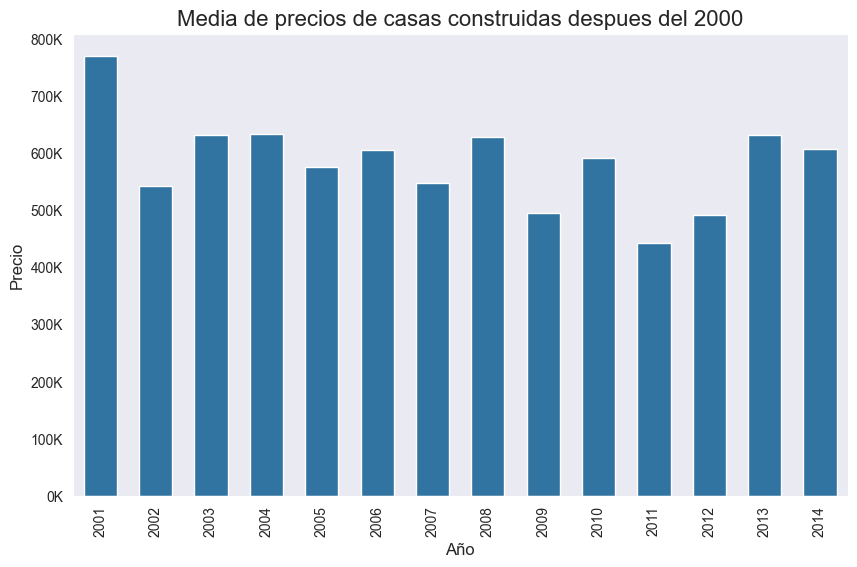

In [72]:
# Se repite el código de arriba, con la variante del año de construcción,
# se calcula la media de las casas construidas despues del 2000
dfFiltrado = df[df['yr_built'] > 2000]
dfPrecioConstruccion = dfFiltrado.groupby('yr_built')['price'].mean().reset_index()

# Promedio de precio de la casa, dependiendo la ciudad
plt.figure(figsize=(10, 6))
sns.barplot(x='yr_built', y='price', data=dfPrecioConstruccion, width=0.6)
plt.xticks(rotation=90)

def formatear_precio(x, pos):
    return f'{int(x/1000)}K' # Funcion para mostrar el precio en decenas de miles

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatear_precio))
plt.title('Media de precios de casas construidas despues del 2000', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Precio', fontsize=12)
plt.show()

# 4 Construcción de Modelo

In [18]:
# Derivado que el modelo de regresion solo acepta valores númericos,
# se usaran las columnas precio, habitaciones, baños y niveles
dfModel = dfClean[['price','bedrooms','bathrooms','floors']]
# Dividir el Dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X = dfModel.drop(columns=['price']) # variables independientes, todas menos precio
y = dfModel['price'] # variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Moldeo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_prediccion = model.predict(X_test).round(2)

print("Prediccion de precio en función de las caracteristicas proporcionadas")
print(f'Resultado del modelo: \n{y_prediccion}')




Prediccion de precio en función de las caracteristicas proporcionadas
Resultado del modelo: 
[ 709460.88  906438.32  648560.62  770361.15  266928.33  532921.37
  648560.62  634283.99  478182.39  524806.03  634283.99  524806.03
  463905.76  648560.62  254605.76  295481.59  634283.99  634283.99
  281204.96  472021.1   634283.99  524806.03  646606.56  281204.96
  524806.03  275043.67  266928.33  634283.99  599982.93  559107.09
  281204.96  512483.45  266928.33  463905.76  403005.5   463905.76
  266928.33  709460.88  585706.3   266928.33  585706.3   252651.7
  648560.62  472021.1   524806.03  784637.78  451583.19  539082.66
  784637.78  573383.72  634283.99  266928.33  463905.76  281204.96
  289320.3   463905.76  403005.5   463905.76  463905.76  478182.39
  266928.33  967338.58  660883.19  620007.36  463905.76  648560.62
  634283.99  463905.76  478182.39  388728.87  585706.3   634283.99
  457744.47  390682.92  559107.09  660883.19  463905.76  721783.46
  646606.56  281204.96  648560.62  59